# SALES PERFORMANCE ANALYSIS 

### By: Abdul-Rahaman Mohammed

##### Introduction
The Superstore Sales dataset that was used in this analysis contains data from January 3, 2015 to January 5, 2019. This dataset es" refers to the sales data and performance of a large retail store offering a wide range of merchandise. Analyzing sales data helps stakehols to understand store performance, identify trends, and make -ata driven business decisi Thea datase 
contasng sal s
transactio s,
including da es,
sales amo nts,
p oduct
categori s, and
sales  leaning:
Hand e missing
val es, remove
dup icates, and
fo mat the data was also done.Analysis (EDA):
Gen rate
descipti e
statistics  and
analyze sal ctive Fe tures Technologi s
regional
per ormance, and Data formance.
Vis alization:
 reate
visualiza ions
such as line 
charts for  ales
trends, ba  charts
for r gional
performa ce, and
pie  The tegory
dwere then summarized istr bution that highlighted
Sum arize
findi gs in a
report 
highlightin  key insights and Key stakeholders for this report are:
Alfido Group
o gain a com
rehensive view
of overall buspatterns, and
areas for
improvement
in sales
performance. owners
Store managers
Analyst teams

In [1]:
#IMPORTATION OF DATA
import os

# Specify the directory where the file is located
directory = '/kaggle/input'

# Loop through the files and assign the file path to a variable
file_path = None
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)  # Construct the full file path
        print(f"File found: {file_path}")

import pandas as pd
import matplotlib.pyplot as plt

# Check if a file was found and assign it to a DataFrame
if file_path:  # Ensure file_path is not None
    # Use `parse_dates` to handle date columns
    SSdata = pd.read_csv(file_path, encoding='latin1', parse_dates=['Order_Date', 'Ship_Date'], dayfirst=True)
    print("Dataset loaded successfully!")
    print(SSdata.head())
else:
    print("No files found to load.")


File found: /kaggle/input/superstore-sales/superstore_final_dataset (1).csv
Dataset loaded successfully!
   Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  Unit

In [2]:
#DATA CLEANING AND EXPLORATION
#checking the names of the columns
print(SSdata.columns)

#Checking for missing data
SSdata.isna().any()

#Exploring the dataypes in the dataset
SSdata.dtypes

#Removing trailing spaces in column names
SSdata.columns = SSdata.columns.str.strip()


# Remove duplicates
SSdata = SSdata.drop_duplicates()

# Handle missing values by either filling or dropping them (choose based on your data context)
SSdata  = SSdata.dropna()  # Forward fill for missing values
# Or use `data = data.dropna()` to drop rows with missing values

print(SSdata['Sales'].dtype)  # Check the data type


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')
float64


In [3]:
#converting the sales column to numeric
SSdata['Sales'] = pd.to_numeric(SSdata['Sales'], errors='coerce')

print(SSdata['Sales'].isna().sum())  # Count of missing values


0


##### Descriptive Statistics
The results show that the mean sales were 230.12. The maximum sales made were 22638.48, whereas the minimum sales were 0.44.

In [4]:
# Descriptive statistics
print(SSdata.describe())

# Sales trend over time
# Group by monthly periods and sum only numeric columns
sales_trend = (
    SSdata.groupby(SSdata['Ship_Date'].dt.to_period("M"))
    .agg({'Sales': 'sum'})
)
print(sales_trend)

# Regional performance
regional_performance = SSdata.groupby('Region')['Sales'].sum()
print("Regional Performance:")
print(regional_performance)

# Product category performance
category_performance = SSdata.groupby('Category')['Sales'].sum()
print("Category Performance:")
print(category_performance)

# Product Shippping Mode performance
class_performance = SSdata.groupby('Ship_Mode')['Sales'].sum()
print("Shipping Mode Performance:")
print(class_performance)

# Product Segment performance
segment_performance = SSdata.groupby('Segment')['Sales'].sum()
print("Segment Performance:")
print(segment_performance)

            Row_ID                     Order_Date  \
count  9789.000000                           9789   
mean   4896.705588  2017-05-01 02:51:57.866993664   
min       1.000000            2015-01-03 00:00:00   
25%    2449.000000            2016-05-23 00:00:00   
50%    4896.000000            2017-06-26 00:00:00   
75%    7344.000000            2018-05-15 00:00:00   
max    9800.000000            2018-12-30 00:00:00   
std    2827.486899                            NaN   

                           Ship_Date   Postal_Code         Sales  
count                           9789   9789.000000   9789.000000  
mean   2017-05-05 01:56:03.898253056  55273.322403    230.116193  
min              2015-01-07 00:00:00   1040.000000      0.444000  
25%              2016-05-27 00:00:00  23223.000000     17.248000  
50%              2017-06-29 00:00:00  58103.000000     54.384000  
75%              2018-05-19 00:00:00  90008.000000    210.392000  
max              2019-01-05 00:00:00  99301.000000  2

<Figure size 1000x600 with 0 Axes>

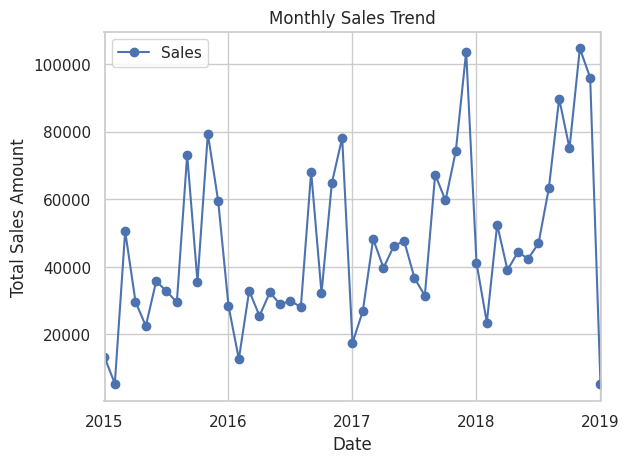

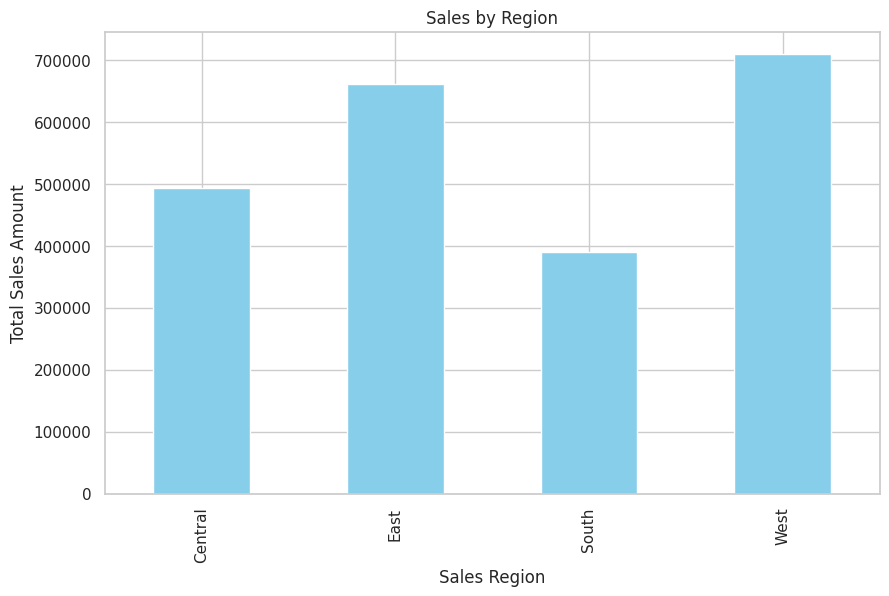

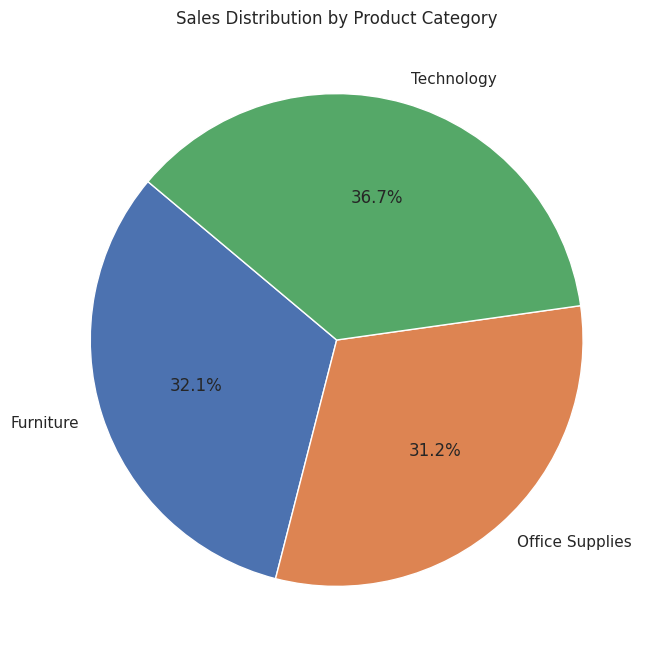

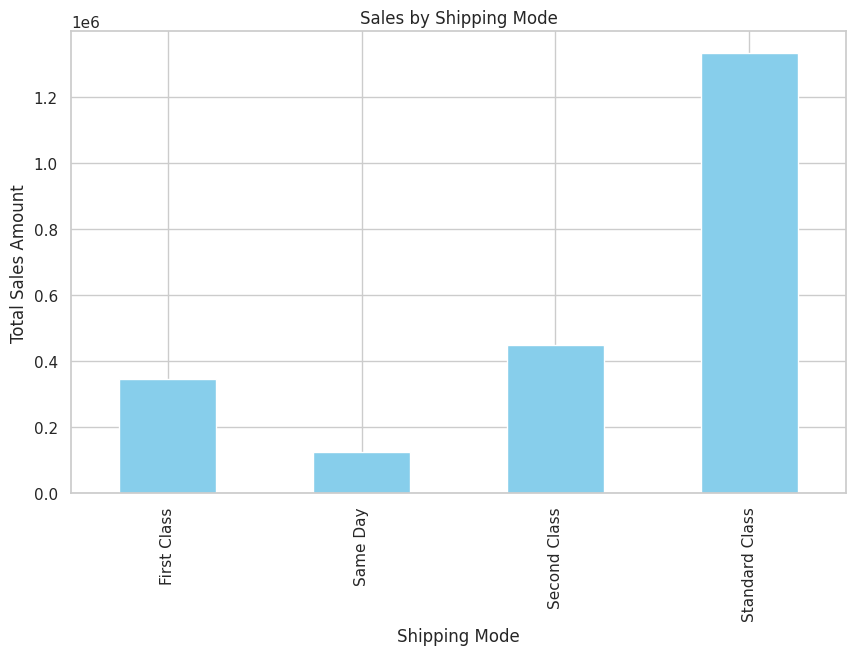

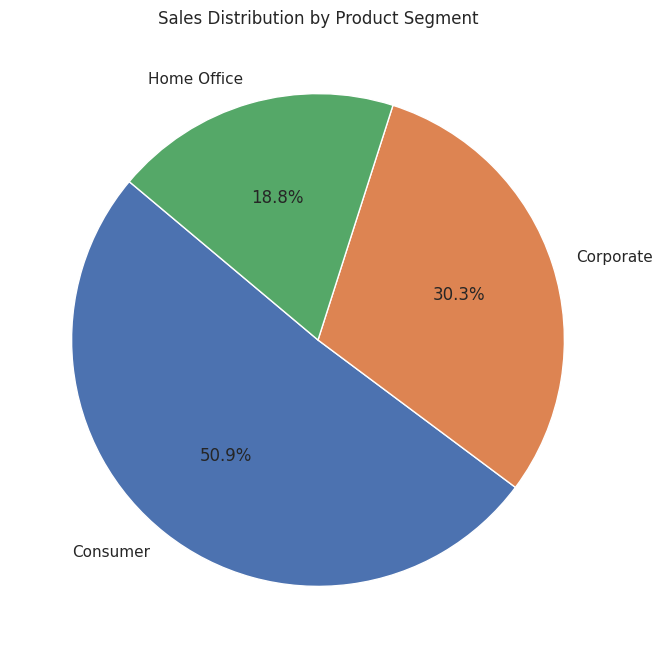

In [5]:
#Importing relevant packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot aesthetics
sns.set(style="whitegrid")

# Sales trends over time (line chart)
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.show()

# Regional performance (bar chart)
plt.figure(figsize=(10, 6))
regional_performance.plot(kind='bar', color='skyblue')
plt.title("Sales by Region")
plt.xlabel("Sales Region")
plt.ylabel("Total Sales Amount")
plt.show()

# Product category distribution (pie chart)
plt.figure(figsize=(8, 8))
category_performance.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Product Category")
plt.ylabel("")  # Hide the y-label for pie chart
plt.show()

# Shipping Mode performance (bar chart)
plt.figure(figsize=(10, 6))
class_performance.plot(kind='bar', color='skyblue')
plt.title("Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Total Sales Amount")
plt.show()

# Product Segment distribution (pie chart)
plt.figure(figsize=(8, 8))
segment_performance.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Product Segment")
plt.ylabel("")  # Hide the y-label for pie chart
plt.show()

##### Report
From the trend diagram, superstores consistently have the highest sales in March, September, and November. This implies that inventory should be well stocked in these months. Also, sales have increased year to year within the five-year period, showing an upward trend in business.

In the bar graph showing sales across regions, the western region has the highest sales, followed by the eastern region. The southern region has the least sales.

With regards to the product category, consumers account for 36.7% of sales volume in technology, furniture accounted for 32.1% of the total sales, and office supplies accounted for 31.2%.

Interms of shipping mode, standard class was the highest shipping mode used by customers. Second-class shipping mode was the next highest, and the least shipping mode was same-day.

Finally, product segmentation of consumers shows that consumers are the majority (50.9%), followed by Cooperate (30.3%). The least segment was home office, which represent 18.8%

##### Recommendations
Superstores should:
1. Increase inventory for March, September, and November, as this is when sales are high.
2. Increase their inventory in every year, about 10% higher than the succeeding year
3. Increase inventory both in the western and eastern regions, as they have the highest sales. They can also prioritize mechanisms that can boost sales at the southern region.
4. Increase inventory in both product category
5. Pay more attention to standard mode of shipping products
6. prioritize services of consumers as they had the highest sales.es.